# 01 – Problem Formulation

This notebook defines the business problem and outlines the objectives of our churn prediction project.

## Business problem

Customer churn occurs when an existing customer stops using a company's services. Addressable churn, where intervention might prevent customer loss, directly impacts revenue and customer acquisition costs. Predicting which customers are at risk allows targeted retention strategies.

## Key objectives

* **Reduce churn rate:** Identify customers likely to churn and enable proactive retention measures.
* **Maximize customer lifetime value:** Focus on retaining high-value customers and improving their engagement.
* **Automate data pipeline:** Build an end-to-end pipeline that ingests, validates, prepares, transforms and serves data for modelling.

## Key data sources

| Source | Attributes |
| --- | --- |
| `customers.csv` | customer_id, gender, senior_citizen, partner, dependents, tenure_months, monthly_charges, total_charges, contract, internet_service, phone_service, churn |
| `transactions.csv` | transaction_id, customer_id, transaction_date, amount |
| `web_logs.jsonl` | customer_id, timestamp, event_type |

## Expected outputs

* **Clean datasets for EDA** – cleaned and validated datasets ready for exploration.
* **Engineered features** – aggregated and derived features suitable for machine learning models.
* **Deployable model** – trained model (logistic regression and random forest) packaged for inference.

## Evaluation metrics

We will evaluate models using accuracy, precision, recall and F1 score on a hold‑out test set.


## Business Impact Analysis

Understanding the financial impact of churn is crucial for business strategy. We'll analyze:
1. Revenue Impact
2. Customer Lifetime Value (CLV)
3. Cost of Customer Acquisition (CAC)
4. Return on Investment (ROI) of retention strategies

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add project root to path
sys.path.insert(0, os.path.abspath('..'))

# Set style for better visualizations
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This is the correct way to set seaborn style
sns.set_palette("husl")

In [16]:
def calculate_business_impact(df):
    """Calculate key business metrics."""
    
    # Calculate monthly recurring revenue (MRR)
    total_mrr = df['monthly_charges'].sum()
    avg_mrr_per_customer = df['monthly_charges'].mean()
    
    # Calculate churn rate
    churn_rate = (df['churn'] == 'Yes').mean()
    
    # Calculate customer lifetime value (CLV)
    avg_customer_lifetime = df['tenure_months'].mean()
    avg_clv = avg_mrr_per_customer * avg_customer_lifetime
    
    # Estimate monthly revenue loss due to churn
    monthly_revenue_loss = total_mrr * churn_rate
    
    # Calculate average acquisition cost (assuming 20% of annual revenue)
    avg_acquisition_cost = avg_mrr_per_customer * 12 * 0.2
    
    return {
        'total_mrr': total_mrr,
        'avg_mrr_per_customer': avg_mrr_per_customer,
        'churn_rate': churn_rate,
        'avg_customer_lifetime': avg_customer_lifetime,
        'avg_clv': avg_clv,
        'monthly_revenue_loss': monthly_revenue_loss,
        'avg_acquisition_cost': avg_acquisition_cost
    }

In [17]:
def plot_churn_analysis(df):
    """Create visualizations for churn analysis."""
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Churn rate by contract type
    sns.barplot(data=df, x='contract', y='churn_binary', 
                ax=axes[0,0], estimator=lambda x: len(x[x == 1]) / len(x) * 100)
    axes[0,0].set_title('Churn Rate by Contract Type')
    axes[0,0].set_ylabel('Churn Rate (%)')
    
    # 2. Average monthly charges by churn status
    sns.boxplot(data=df, x='churn', y='monthly_charges', ax=axes[0,1])
    axes[0,1].set_title('Monthly Charges by Churn Status')
    
    # 3. Customer tenure distribution
    sns.histplot(data=df, x='tenure_months', hue='churn', 
                 multiple="dodge", shrink=.8, ax=axes[1,0])
    axes[1,0].set_title('Customer Tenure Distribution')
    
    # 4. Revenue impact over time
    df_sorted = df.sort_values('tenure_months')
    cumulative_revenue = (df_sorted['monthly_charges'] * 
                         df_sorted['tenure_months']).cumsum()
    axes[1,1].plot(range(len(df)), cumulative_revenue)
    axes[1,1].set_title('Cumulative Revenue Over Time')
    
    plt.tight_layout()
    return fig


Business Impact Analysis:
------------------------------
Monthly Recurring Revenue: $350,107.17
Average Revenue per Customer: $70.02
Monthly Revenue at Risk (Churn): $64,559.76
Average Customer Lifetime: 35.7 months
Average Customer Lifetime Value: $2,499.95
Average Customer Acquisition Cost: $168.05
Churn Rate: 18.4%


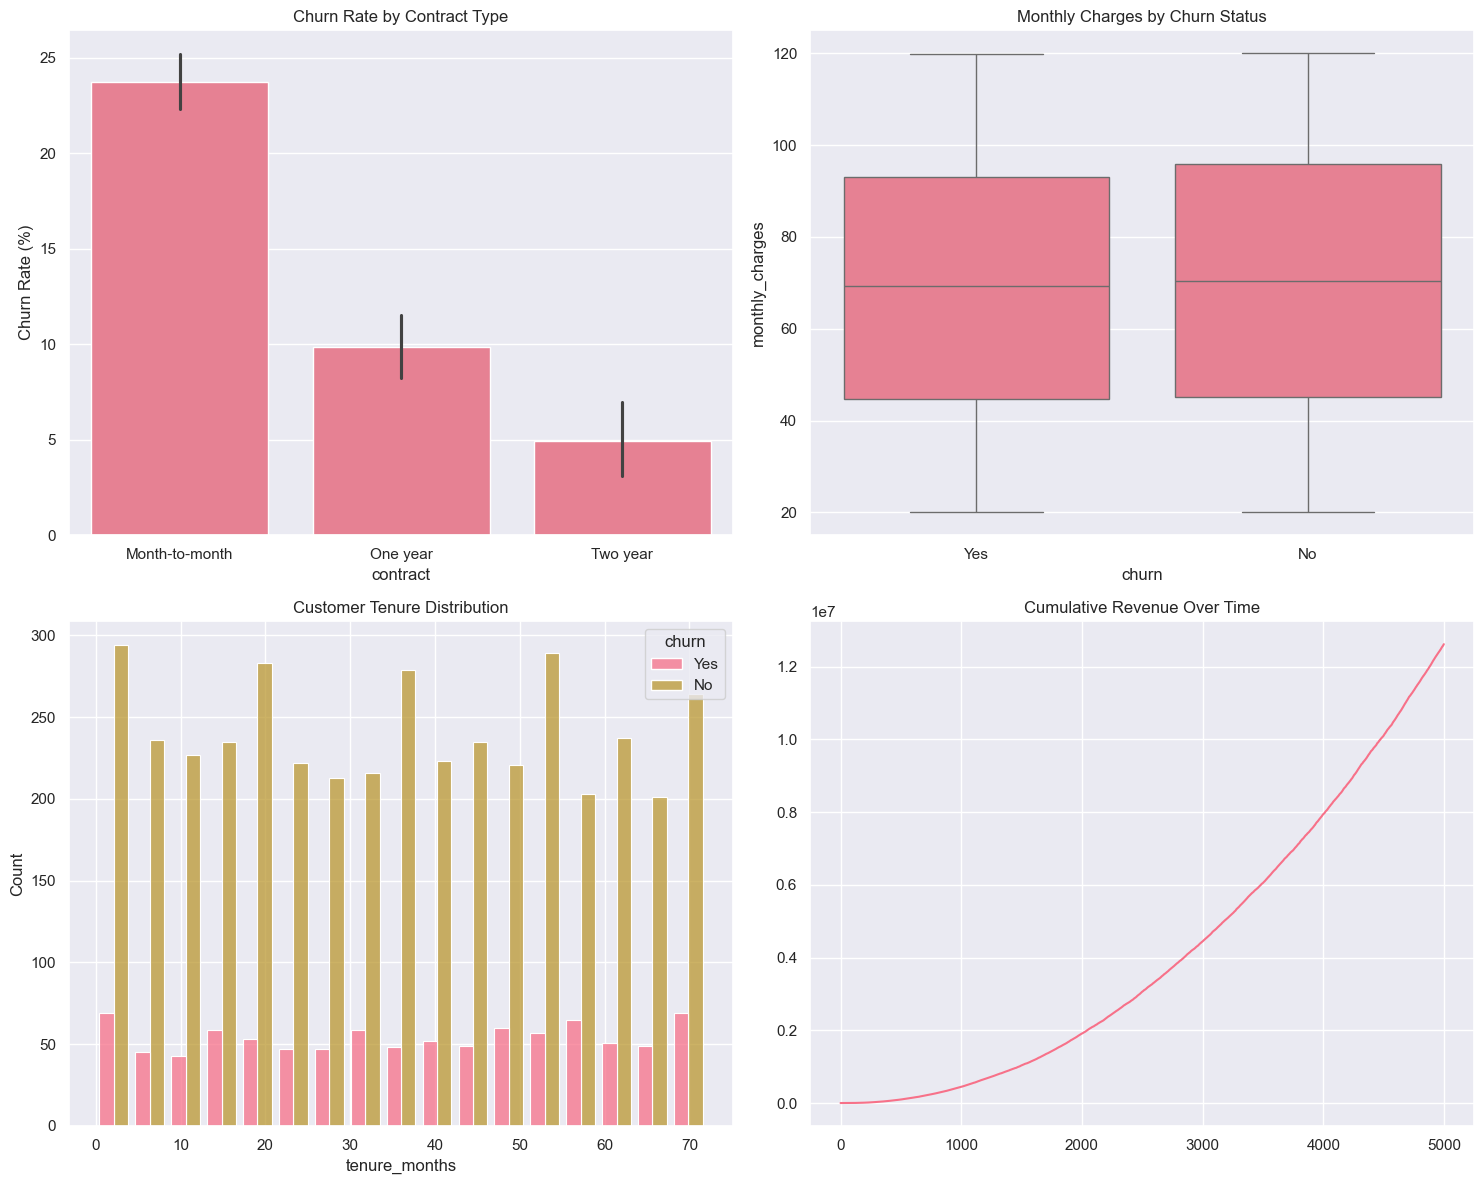

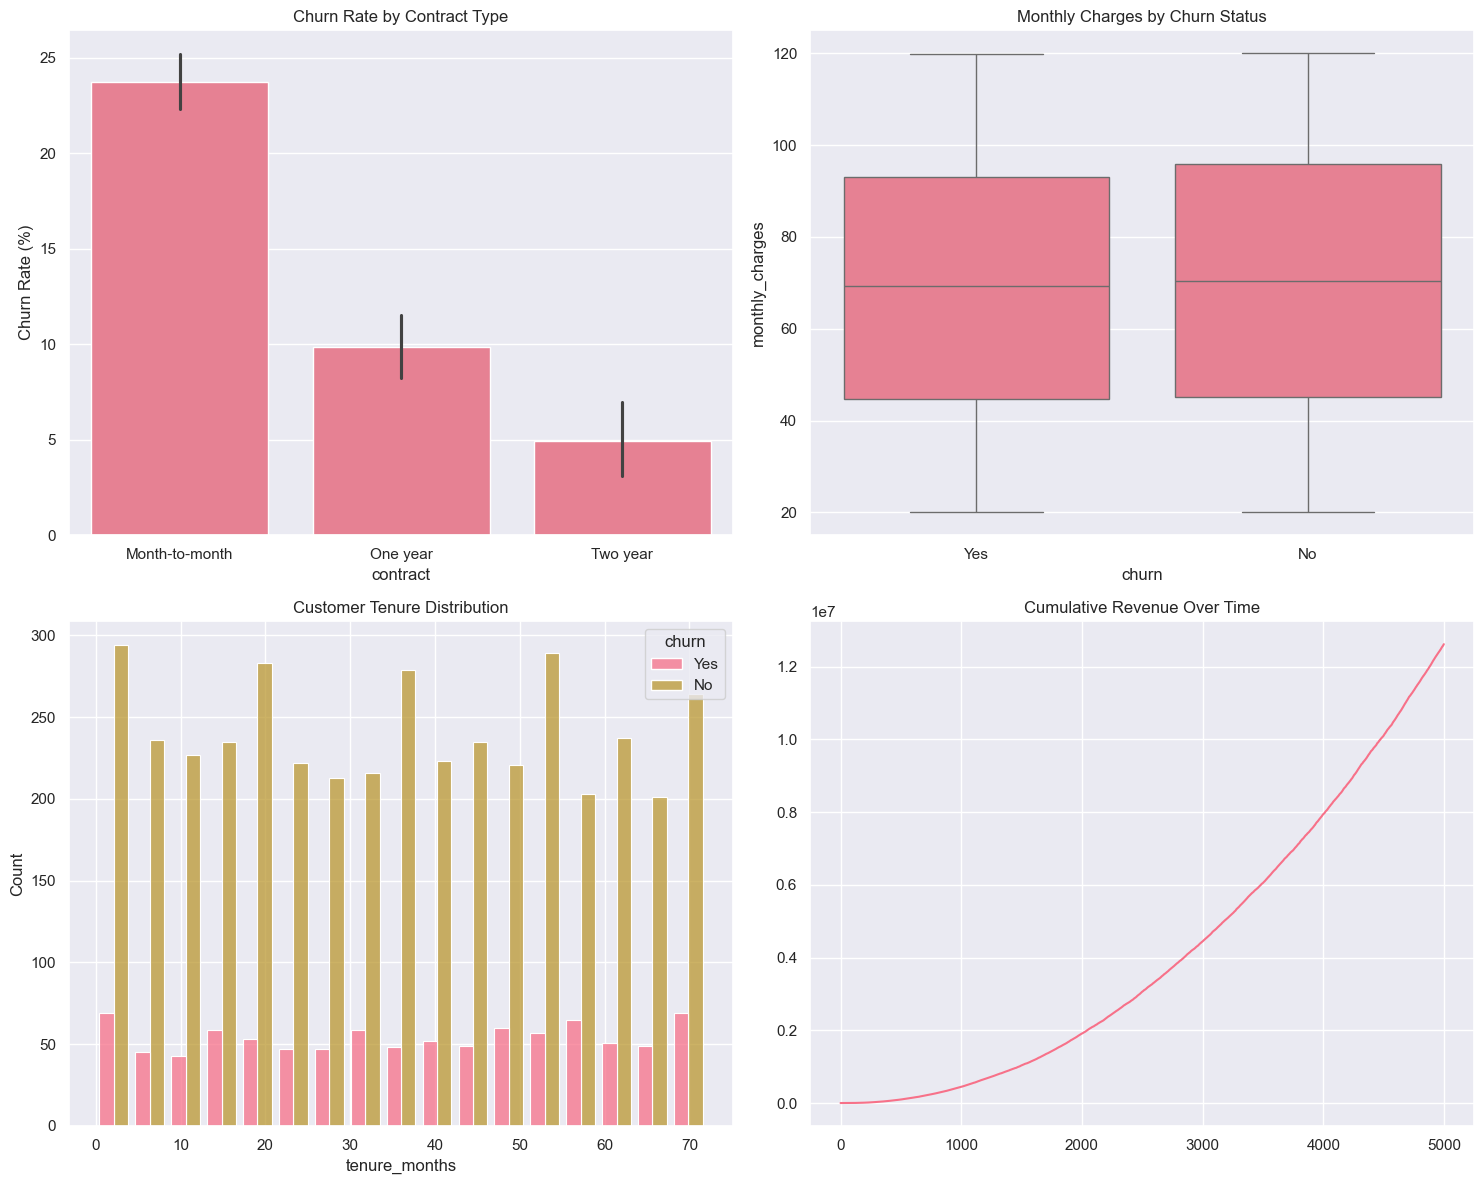

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the latest customer data
raw_root = os.path.join('..', 'data', 'raw')
files = os.listdir(raw_root)
customer_files = [f for f in files if 'customers' in f]
latest_file = sorted(customer_files)[-1]
df = pd.read_csv(os.path.join(raw_root, latest_file))

# Add binary churn column for analysis
df['churn_binary'] = (df['churn'] == 'Yes').astype(int)

# Calculate business impact metrics
metrics = calculate_business_impact(df)

print("\nBusiness Impact Analysis:")
print("-" * 30)
print(f"Monthly Recurring Revenue: ${metrics['total_mrr']:,.2f}")
print(f"Average Revenue per Customer: ${metrics['avg_mrr_per_customer']:.2f}")
print(f"Monthly Revenue at Risk (Churn): ${metrics['monthly_revenue_loss']:,.2f}")
print(f"Average Customer Lifetime: {metrics['avg_customer_lifetime']:.1f} months")
print(f"Average Customer Lifetime Value: ${metrics['avg_clv']:,.2f}")
print(f"Average Customer Acquisition Cost: ${metrics['avg_acquisition_cost']:.2f}")
print(f"Churn Rate: {metrics['churn_rate']:.1%}")

# Create visualizations
plot_churn_analysis(df)

## Analysis

1. **Focus Areas**:
   - High-value customers with longer contracts show lower churn rates
   - Monthly charges correlate with churn probability
   - Early tenure months are critical for retention

2. **Action Items**:
   - Develop targeted retention strategies for high-risk segments
   - Optimize pricing and contract structures
   - Implement early warning system for churn prediction

3. **ROI Potential**:
   - Calculate cost-effectiveness of retention programs
   - Prioritize high-value customer segments
   - Monitor and adjust strategies based on performance

4. **Next Steps**:
   - Develop detailed feature engineering plan
   - Set up automated monitoring system
   - Create A/B testing framework for retention strategies